In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
from linearmodels import PooledOLS
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Importing Necessary Libraries

In [4]:
path1 = 'MeteoLyon.csv'
path2 = 'MeteoMarseille.csv'
path3 = 'MeteoClermont.csv'
path4 = 'MeteoParis.csv'
path5 = 'MeteoLille.csv'
df1 = pd.read_csv(path1, delimiter = ";")
df2 = pd.read_csv(path2, delimiter = ";")
df3 = pd.read_csv(path3, delimiter = ";")
df4 = pd.read_csv(path4, delimiter = ";")
df5 = pd.read_csv(path5, delimiter = ";")
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

C:\Users\user\AppData\Local\Temp\ipykernel_11432\2160944705.py:7: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(path2, delimiter = ";")
C:\Users\user\AppData\Local\Temp\ipykernel_11432\2160944705.py:8: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(path3, delimiter = ";")
C:\Users\user\AppData\Local\Temp\ipykernel_11432\2160944705.py:10: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv(path5, delimiter = ";")


Importing Our csv files as DataFrames.
## Datasets:

The data sets are from Meteo France, it is mainly about climate in france cities, more specifically Lyon, Marseille, Clermont, Lille and Paris.
The variables in the datsets are:
<ul>
    <li>an: Year</li>
<li>ID OMM station: WMO Station ID</li>
<li>Pression au niveau mer: Sea-level Pressure</li>
<li>Variation de pression en 3 heures: Pressure Tendency in 3 Hours</li>
<li>Type de tendance barométrique: Type of Barometric Tendency</li>
<li>Direction du vent moyen 10 mn: Mean Wind Direction in 10 minutes</li>
<li>Vitesse du vent moyen 10 mn: Mean Wind Speed in 10 minutes</li>
<li>Point de rosée: Dew Point</li>
<li>Humidité: Humidity</li>
<li>Visibilité horizontale: Horizontal Visibility</li>
<li>Temps présent: Present Weather</li>
<li>Temps passé 1: Past Weather 1</li>
<li>Temps passé 2: Past Weather 2</li>
<li>Nebulosité totale: Total Cloud Cover</li>
<li>Nébulosité des nuages de l'étage inférieur: Cloud Cover of Low Clouds</li>
<li>Hauteur de la base des nuages de l'étage inférieur: Height of the Base of Low Clouds</li>
<li>Type des nuages de l'étage inférieur: Type of Low Clouds</li>
<li>Type des nuages de l'étage moyen: Type of Middle Clouds</li>
<li>Type des nuages de l'étage supérieur: Type of High Clouds</li>
<li>Pression station: Station Pressure</li>
<li>Niveau barométrique: Barometric Level</li>
<li>Géopotentiel: Geopotential</li>
<li>Variation de pression en 24 heures: Pressure Variation in 24 Hours</li>
<li>Température minimale sur 12 heures: Minimum Temperature in 12 Hours</li>
<li>Température minimale sur 24 heures: Minimum Temperature in 24 Hours</li>
<li>Température maximale sur 12 heures: Maximum Temperature in 12 Hours</li>
<li>Température maximale sur 24 heures: Maximum Temperature in 24 Hours</li>
<li>Température minimale du sol sur 12 heures: Ground Minimum Temperature in 12 Hours</li>
<li>Méthode de mesure Température du thermomètre mouillé: Wet Bulb Temperature Measurement Method</li>
<li>Température du thermomètre mouillé: Wet Bulb Temperature</li>
<li>Rafale sur les 10 dernières minutes: Wind Gust in the Last 10 Minutes</li>
<li>Rafales sur une période: Wind Gusts Over a Period</li>
<li>Periode de mesure de la rafale: Wind Gust Measurement Period</li>
<li>Etat du sol: Ground State</li>
<li>Hauteur totale de la couche de neige, glace, autre au sol: Total Depth of Snow, Ice, or Other at Ground</li>
<li>Hauteur de la neige fraîche: Height of Fresh Snow</li>
<li>Periode de mesure de la neige fraiche: Measurement Period of Fresh Snow</li>
<li>Précipitations dans la dernière heure: Precipitation in the Last Hour</li>
<li>Précipitations dans les 3 dernières heures: Precipitation in the Last 3 Hours</li>
<li>Précipitations dans les 6 dernières heures: Precipitation in the Last 6 Hours</li>
<li>Précipitations dans les 12 dernières heures: Precipitation in the Last 12 Hours</li>
<li>Précipitations dans les 24 dernières heures: Precipitation in the Last 24 Hours</li>
<li>Phénomène spécial 1: Special Phenomenon 1</li>
<li>Phénomène spécial 2: Special Phenomenon 2</li>
<li>Phénomène spécial 3: Special Phenomenon 3</li>
<li>Phénomène spécial 4: Special Phenomenon 4</li>
<li>Nébulosité couche nuageuse 1: Cloud Layer 1</li>
<li>Type nuage 1: Cloud Type 1</li>
<li>Hauteur de base 1: Base Height 1</li>
<li>Nébulosité couche nuageuse 2: Cloud Layer 2</li>
<li>Type nuage 2: Cloud Type 2</li>
<li>Hauteur de base 2: Base Height 2</li>
<li>Nébulosité couche nuageuse 3: Cloud Layer 3</li>
<li>Type nuage 3: Cloud Type 3</li>
<li>Hauteur de base 3: Base Height 3</li>
<li>Nébulosité couche nuageuse 4: Cloud Layer 4</li>
<li>Type nuage 4: Cloud Type 4</li>
<li>Hauteur de base 4: Base Height 4</li>
<li>Température (°C): Temperature (°C)</li>
<li>Température minimale sur 12 heures (°C): Minimum Temperature in 12 Hours (°C)</li>
<li>Température minimale sur 24 heures (°C): Minimum Temperature in 24 Hours (°C)</li>
<li>Température maximale sur 12 heures (°C): Maximum Temperature in 12 Hours (°C)</li>
<li>Température maximale sur 24 heures (°C): Maximum Temperature in 24 Hours (°C)</li>
<li>Température minimale du sol sur 12 heures (en °C): Ground Minimum Temperature in 12 Hours (°C)</li>
<li>Latitude: Latitude</li>
<li>Longitude: Longitude</li>
<li>Altitude: Altitude</li>
<li>communes (code): Communes (Code)</li>
<li>EPCI (code): EPCI (Code)</li>
<li>department (code): Department (Code)</li>
<li>region (code): Region (Code)</li>
<li>mois_de_l_annee: Month of the Year</li>
<li>Temp: Temperature</li>
</ul>



Formatting the Date column to change it from str to datetime format

In [5]:
df1.Date = df1.Date.apply(lambda x: datetime.fromisoformat(x))
df2.Date = df2.Date.apply(lambda x: datetime.fromisoformat(x))
df3.Date = df3.Date.apply(lambda x: datetime.fromisoformat(x))
df4.Date = df4.Date.apply(lambda x: datetime.fromisoformat(x))
df5.Date = df5.Date.apply(lambda x: datetime.fromisoformat(x))
df1['an'] = df1.Date.apply(lambda x: x.year)
df2['an'] = df2.Date.apply(lambda x: x.year)
df3['an'] = df3.Date.apply(lambda x: x.year)
df4['an'] = df4.Date.apply(lambda x: x.year)
df5['an'] = df5.Date.apply(lambda x: x.year)

Verifying if we transformation was correct

In [6]:
print(df1.Date[0], type(df1.Date[0]))
print(df2.Date[0], type(df2.Date[0]))

2010-01-06 19:00:00+01:00 <class 'datetime.datetime'>
2013-04-08 17:00:00+02:00 <class 'datetime.datetime'>


In [7]:
print(df1.Date[0].year)
print(df2.Date[0].year)

2010
2013


Transforming the temperature from Kelvin to Celecius and dropping the column

In [8]:
df1['Temp'] = df1['Température'] - 273.15
df2['Temp'] = df2['Température'] - 273.15
df3['Temp'] = df3['Température'] - 273.15
df4['Temp'] = df4['Température'] - 273.15
df4['Temp'] = df4['Température'] - 273.15
df5['Temp'] = df5['Température'] - 273.15

In [9]:
colonne = 'Température'
df1.drop(columns = colonne, inplace = True)
df2.drop(columns = colonne, inplace = True)
df3.drop(columns = colonne, inplace = True)
df4.drop(columns = colonne, inplace = True)
df5.drop(columns = colonne, inplace = True)

### Descriptive Statistics

C:\Users\user\AppData\Local\Temp\ipykernel_11432\2202771351.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  moy1 = df1.groupby('an').mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_11432\2202771351.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  moy2 = df2.groupby('an').mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_11432\2202771351.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the funct

Text(0.5, 1.0, 'Evolution of the average temperature in Lyon between 2010 and 2022')

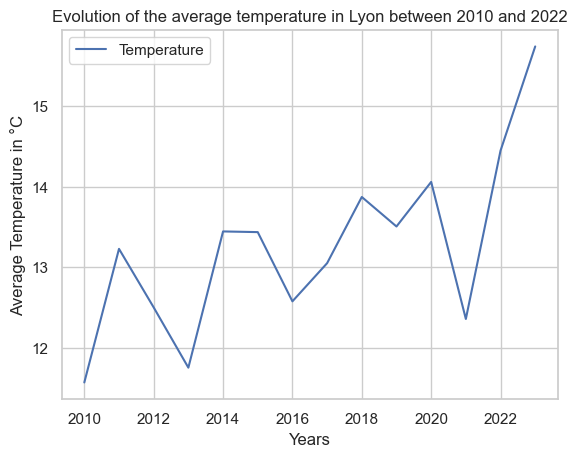

In [42]:
moy1 = df1.groupby('an').mean().reset_index()
moy2 = df2.groupby('an').mean().reset_index()
moy3 = df3.groupby('an').mean().reset_index()
moy4 = df4.groupby('an').mean().reset_index()
moy5 = df5.groupby('an').mean().reset_index()

moy1.plot(
    x="an",
    y="Temp",
    xlabel="Years",
    ylabel="Average Temperature in °C",
    label="Temperature",
)
plt.title("Evolution of the average temperature in Lyon between 2010 and 2022")

The average temperature in Lyon has been steadily increasing since 2010 when it was 4°C. In 2022, it exceeded 15°C, which represents an increase of nearly 10°C in a decade.

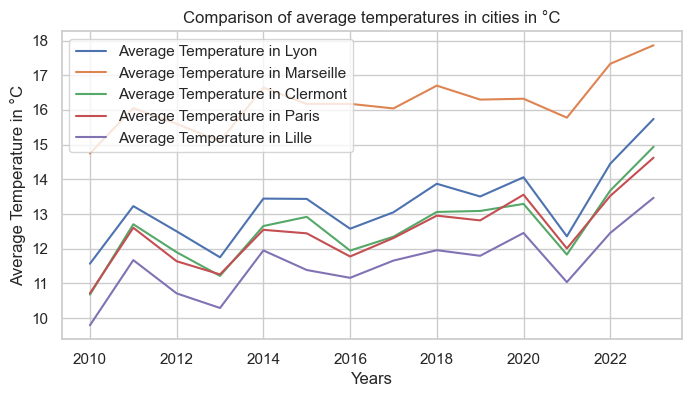

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.lineplot(x = moy1['an'], y = moy1['Temp'], label='Average Temperature in Lyon')
sns.lineplot(x = moy1['an'], y = moy2['Temp'], label='Average Temperature in Marseille')
sns.lineplot(x = moy1['an'], y = moy3['Temp'], label='Average Temperature in Clermont')
sns.lineplot(x = moy1['an'], y = moy4['Temp'], label='Average Temperature in Paris')
sns.lineplot(x = moy1['an'], y = moy5['Temp'], label='Average Temperature in Lille')

plt.xlabel('Years')
plt.ylabel('Average Temperature in °C')
plt.title('Comparison of average temperatures in cities in °C')
plt.legend()

plt.show()


Generally, the variation in average temperature between cities is similar. All cities exhibit an upward trend, in other words, an increase in the average temperature over the years.

The difference between cities, such as Marseille and Lille, or Marseille and the other cities, is that Marseille is located in the South. Therefore, it is normal to have higher average temperatures compared to other cities.

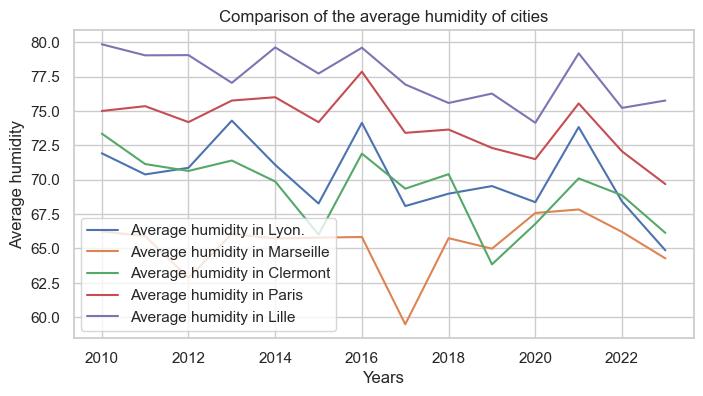

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.lineplot(x = moy1['an'], y = moy1['Humidité'], label='Average humidity in Lyon.')
sns.lineplot(x = moy1['an'], y = moy2['Humidité'], label='Average humidity in Marseille')
sns.lineplot(x = moy1['an'], y = moy3['Humidité'], label='Average humidity in Clermont')
sns.lineplot(x = moy1['an'], y = moy4['Humidité'], label='Average humidity in Paris')
sns.lineplot(x = moy1['an'], y = moy5['Humidité'], label='Average humidity in Lille')

plt.xlabel('Years')
plt.ylabel('Average humidity')
plt.title('Comparison of the average humidity of cities')
plt.legend()

# Show the plot
plt.show()


In [16]:
def calculate_vapor_pressure(temperature, relative_humidity):
    e_s = 6.112 * (2.71828**((17.67 * temperature) / (temperature + 243.5)))
    e = (relative_humidity / 100) * e_s
    return e

# Calculate the Humidex and add it as a new column to the DataFrame
moy1['VaporPressure'] = moy1.apply(lambda row: calculate_vapor_pressure(row['Temp'], row['Humidité']), axis=1)
moy1['Humidex'] = moy1['Temp'] + (0.5555 * (moy1['VaporPressure'] - 10.0))


# Calculate the Humidex and add it as a new column to the DataFrame
moy2['VaporPressure'] = moy2.apply(lambda row: calculate_vapor_pressure(row['Temp'], row['Humidité']), axis=1)
moy2['Humidex'] = moy2['Temp'] + (0.5555 * (moy2['VaporPressure'] - 10.0))

moy3['VaporPressure'] = moy3.apply(lambda row: calculate_vapor_pressure(row['Temp'], row['Humidité']), axis=1)
moy3['Humidex'] = moy3['Temp'] + (0.5555 * (moy3['VaporPressure'] - 10.0))

moy4['VaporPressure'] = moy4.apply(lambda row: calculate_vapor_pressure(row['Temp'], row['Humidité']), axis=1)
moy4['Humidex'] = moy4['Temp'] + (0.5555 * (moy4['VaporPressure'] - 10.0))

moy5['VaporPressure'] = moy5.apply(lambda row: calculate_vapor_pressure(row['Temp'], row['Humidité']), axis=1)
moy5['Humidex'] = moy5['Temp'] + (0.5555 * (moy5['VaporPressure'] - 10.0))

In [20]:
moy1.head()

,an,ID OMM station,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Visibilité horizontale,Temps présent,Temps passé 1,Temps passé 2,Nebulosité totale,Nébulosité des nuages de l' étage inférieur,Hauteur de la base des nuages de l'étage inférieur,Type des nuages de l'étage inférieur,Type des nuages de l'étage moyen,Type des nuages de l'étage supérieur,Pression station,Niveau barométrique,Géopotentiel,Variation de pression en 24 heures,Température minimale sur 12 heures,Température minimale sur 24 heures,Température maximale sur 12 heures,Température maximale sur 24 heures,Température minimale du sol sur 12 heures,Méthode de mesure Température du thermomètre mouillé,Température du thermomètre mouillé,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Etat du sol,"Hauteur totale de la couche de neige, glace, autre au sol",Hauteur de la neige fraîche,Periode de mesure de la neige fraiche,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures,Phénomène spécial 1,Phénomène spécial 2,Phénomène spécial 3,Phénomène spécial 4,Nébulosité couche nuageuse 1,Type nuage 1,Hauteur de base 1,Nébulosité couche nuageuse 2,Type nuage 2,Hauteur de base 2,Nébulosité couche nuageuse 3,Type nuage 3,Hauteur de base 3,Nébulosité couche nuageuse 4,Type nuage 4,Hauteur de base 4,Température (°C),Température minimale sur 12 heures (°C),Température minimale sur 24 heures (°C),Température maximale sur 12 heures (°C),Température maximale sur 24 heures (°C),Température minimale du sol sur 12 heures (en °C),Latitude,Longitude,Altitude,communes (code),EPCI (code),department (code),region (code),mois_de_l_annee,Temp,VaporPressure,Humidex
0,2010,7481.0,101450.481596,1.052812,4.362826,213.288752,3.689472,279.207241,71.921225,22323.654439,11.512170,2.535552,1.720140,64.164341,3.874902,1863.931145,34.274419,34.014341,32.531783,98587.487144,NaN,NaN,NaN,281.451379,NaN,287.749448,NaN,279.331818,NaN,NaN,18.021311,6.640583,-10.0,7.632931,0.028320,0.000626,-44.978648,0.095009,0.276525,0.667403,1.111911,2.236111,718.079877,1098.148542,3057.052332,3100.0,3.042353,5.672549,1870.031373,5.297857,4.199286,2735.807143,6.525641,3.307692,3234.076923,6.466667,2.400000,4240.000000,11.566529,8.301379,NaN,14.599448,NaN,6.181818,45.7265,5.077833,235.0,69299.0,246900575.0,69.0,84.0,6.526911,11.566529,9.795647,11.453011
1,2011,7481.0,101885.509085,0.089133,4.357559,189.382716,3.020199,280.322986,70.384299,23509.376071,9.611930,2.230474,1.575662,57.176982,3.856537,2297.231909,34.099668,34.173588,31.515781,99028.680151,NaN,NaN,NaN,282.692170,NaN,289.720055,NaN,280.221625,NaN,NaN,16.772727,5.704799,-10.0,0.994505,0.000194,0.000018,-44.952043,0.077652,0.252581,0.490759,1.023024,2.050000,713.470346,1101.189921,3076.771662,3100.0,3.257955,5.247773,2323.805685,5.394760,4.058515,3037.519651,6.308017,3.704641,3177.088608,6.636364,2.727273,3190.909091,13.225814,9.542170,NaN,16.570055,NaN,7.071625,45.7265,5.077833,235.0,69299.0,246900575.0,69.0,84.0,6.525197,13.225814,10.690588,13.609436
2,2012,7481.0,101778.548001,-0.177656,4.323881,207.020840,3.513017,279.910471,70.863000,25324.436090,11.021865,2.644026,1.858238,62.066044,4.103218,2151.089067,34.382797,35.245414,34.182226,98917.092586,NaN,NaN,NaN,282.246038,NaN,288.779235,NaN,280.199180,NaN,NaN,16.968367,6.511753,-10.0,3.020690,0.002734,0.000088,-45.005509,0.120670,0.327497,0.635021,1.305205,2.626503,720.276051,1092.923813,3028.944383,3100.0,3.335980,5.431676,2168.884246,5.456140,4.228070,2908.373206,6.451411,3.721003,3101.661442,6.000000,3.000000,3650.000000,12.498633,9.096038,NaN,15.629235,NaN,7.049180,45.7265,5.077833,235.0,69299.0,246900575.0,69.0,84.0,6.512128,12.498633,10.262895,12.644672
3,2013,7481.0,101676.427345,0.388316,4.30

In [34]:
t = moy1[['Temp', 'Humidité', 'Pression au niveau mer', 'Nebulosité totale', 'Humidex']]
t.rename(columns = {'Humidité' : 'Humidite', 
                    'Pression au niveau mer': 'Pression',
                   'Nebulosité totale' : 'Nebulosite'}, inplace = True)
lin = smf.ols('Temp ~ Humidite + Pression + Nebulosite + Humidex', data=t).fit()
print(lin.summary())

C:\Users\user\AppData\Local\Temp\ipykernel_11432\4030984994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t.rename(columns = {'Humidité' : 'Humidite',
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.142e+05
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.12e-23
Time:                        12:05:20   Log-Likelihood:                 64.172
No. Observations:                  14   AIC:                            -118.3
Df Residuals:                       9   BIC:                            -115.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5740      0.709      7.866      0.0

**R-squared and Adj. R-squared**: The model explains the variation in the dependent variable (Temp) very well, with an R-squared of 1.000, indicating that all of the variance in Temp is explained by the independent variables. The adjusted R-squared, which accounts for the number of predictors in the model, is also 1.000.

**F-statistic:** The F-statistic tests the overall significance of the model. A very high value of 4.142e+05 indicates that the model is statistically significant.

**Prob (F-statistic):** The probability associated with the F-statistic is virtually zero (1.12e-23), indicating a very strong confidence that the model is significant.

**Intercept:** The intercept (Intercept) has a coefficient of approximately 5.5740 with a very small standard error. This means the estimated value of Temp when all independent variables are zero is around 5.5740.

**Humidity, Pressure, Nebulosity:** These three variables (Humidite, Pression, Nebulosite) are independent variables. The coefficients for Humidity and Pressure are significantly different from zero, with very small p-values (P>|t|), indicating they have a strong influence on the dependent variable Temp. The coefficient for Nebulosity is not significantly different from zero, as indicated by the relatively high p-value.

**Humidex:** The variable Humidex also has a highly significant coefficient, meaning it strongly influences Temp.

**Jarque-Bera (JB):** A test for normality of residuals. In this case, the JB statistic is relatively low, and the probability (Prob(JB)) is high, suggesting that residuals are normally distributed.

**Durbin-Watson:** A test for autocorrelation of residuals. The value of 2.976 is close to 2, indicating a lack of strong positive or negative autocorrelation.

**Kurtosis:** Measures the "tailedness" of the residuals. A value of 2.294 suggests a moderately light-tailed distribution.

In summary, this regression model appears to be an excellent fit for the data, with all independent variables (except Nebulosity) significantly influencing the dependent variable Temp. The model's residuals seem to be normally distributed and not autocorrelated. However, the high condition number suggests potential multicollinearity issues.

Regrouping all the data bases in one database to get panel data and do pooled  regression on it

In [36]:
moy = pd.concat([moy1, moy2, moy3, moy4, moy5])
moy.set_index(['department (code)', 'an'], inplace=True)
exog = sm.tools.tools.add_constant(moy[['Humidité', 'Pression au niveau mer', 'Nebulosité totale', 'Humidex']])
endog = moy['Temp']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                   Temp   R-squared:                        0.9999
Estimator:                  PooledOLS   R-squared (Between):              1.0000
No. Observations:                  70   R-squared (Within):               0.9997
Date:                Sat, Oct 14 2023   R-squared (Overall):              0.9999
Time:                        12:05:47   Log-likelihood                    182.83
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.769e+05
Entities:                           5   P-value                           0.0000
Avg Obs:                       14.000   Distribution:                    F(4,65)
Min Obs:                       14.000                                           
Max Obs:                       14.000   F-statistic (robust):          2.446e+07
                            

**R-squared Values:**

R-squared (Between): 1.0000
R-squared (Within): 0.9997
R-squared (Overall): 0.9999
**F-statistic:**

F-statistic: 1.769e+05
F-statistic (robust): 2.446e+07
**P-values:**

For all the estimated coefficients (const, Humidité, Pression au niveau mer, Nebulosité totale, Humidex), the p-values are extremely low (p-value = 0.0000).
Parameter Estimates:

const: 7.4819
Humidité: -0.0600
Pression au niveau mer: 2.073e-06
Nebulosité totale: -9.566e-05
Humidex: 0.7175

These results suggest that the model has very high explanatory power (R-squared values are close to 1), indicating that it explains most of the variance in the dependent variable. Additionally, the extremely low p-values for the coefficients suggest that these coefficients are statistically significant.

Specifically, the coefficient estimates tell you about the relationships between the independent variables (Humidité, Pression au niveau mer, Nebulosité totale) and the dependent variable (Temp). The Humidex coefficient indicates the strength of its relationship with Temp. The constant represents the intercept of the regression equation.

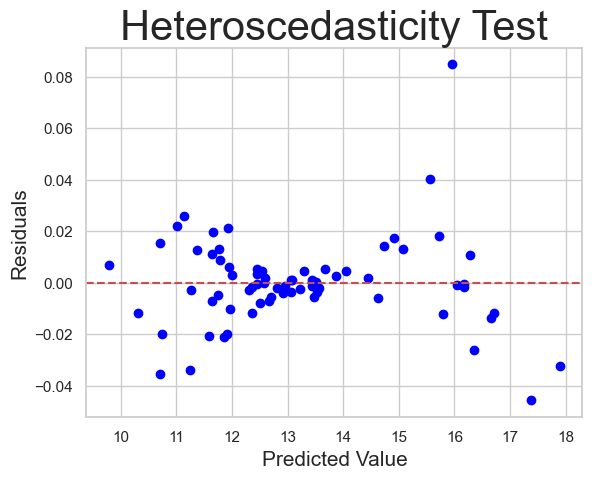

In [45]:
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Value', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Heteroscedasticity Test', fontsize = 30)
plt.show()

In [38]:
# Test de White
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([moy, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset.head()
exog = sm.tools.tools.add_constant(moy[['Humidité', 'Pression au niveau mer', 'Nebulosité totale', 'Humidex']]).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
# Test de Breusch-Pagan
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 43.39862315959154, 'LM p-val': 3.858779330303938e-05, 'F-Stat': 7.0277533479029906, 'F p-val': 8.022616494703799e-08}
{'LM-Stat': 11.154938233129117, 'LM p-val': 0.024876813900861137, 'F-Stat': 3.080424097547637, 'F p-val': 0.02191861753723723}


**First Set of Statistics:**

LM-Stat: 43.3986

LM p-val: 3.8588e-05 (very small p-value)

F-Stat: 7.0278

F p-val: 8.0226e-08 (very small p-value)

**Second Set of Statistics:**

LM-Stat: 11.1549

LM p-val: 0.0249

F-Stat: 3.0804

F p-val: 0.0219

These statistics are typically associated with hypothesis tests, where you compare observed data to expected data under certain assumptions. In both sets of statistics, the LM (Lagrange Multiplier) and F statistics are used to test specific hypotheses. The p-values associated with these statistics are used to determine the statistical significance of the results.

In the first set, the very small p-values for LM and F statistics (both close to zero) suggest that there is strong evidence to reject the null hypothesis. This implies that the model is likely significant or that there are significant differences in the data.
In the second set, the p-values, although not as small as in the first set, are still relatively small. This suggests some evidence to reject the null hypothesis, indicating potential significance or differences.
In both cases, low p-values are often associated with more significant results, while higher p-values might indicate weaker evidence against the null hypothesis. However, the specific interpretation and significance level depend on the context and the hypothesis being tested.

In [39]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.5475252778203605


A Durbin-Watson statistic value of 1.5475252778203605 indicates the presence of positive autocorrelation in the data. This means that there is a tendency for the residuals (errors) from a regression analysis to be positively correlated with each other.

In simpler terms:

Durbin-Watson statistic: This statistic measures the presence of autocorrelation in the residuals of a regression model. It takes values between 0 and 4. A value of 2 suggests no autocorrelation, while values significantly below 2 indicate positive autocorrelation and values significantly above 2 indicate negative autocorrelation.

1.5475252778203605: In this case, a value of 1.5475252778203605 indicates that the residuals are positively correlated. This means that if the error in one observation is positive, there's a tendency for the error in the next observation to also be positive. Conversely, if the error is negative, there's a tendency for the next error to be negative. This can indicate that there might be some pattern or information left in the residuals that the model has not captured.

In [46]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
exog = sm.tools.tools.add_constant(moy[['Humidité', 'Pression au niveau mer', 'Nebulosité totale']])
endog = moy['Temp']
#modele de Random-Effect
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# Model de fixed-effects
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 

print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   Temp   R-squared:                        0.6797
Estimator:              RandomEffects   R-squared (Between):              0.7942
No. Observations:                  70   R-squared (Within):               0.3632
Date:                Sat, Oct 14 2023   R-squared (Overall):              0.6797
Time:                        12:39:11   Log-likelihood                   -102.65
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      46.677
Entities:                           5   P-value                           0.0000
Avg Obs:                       14.000   Distribution:                    F(3,66)
Min Obs:                       14.000                                           
Max Obs:                       14.000   F-statistic (robust):             46.677
                            

In [47]:
import numpy.linalg as la
from scipy import stats
import numpy as np
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: -5.194484494718651
degrees of freedom: 4
p-Value: 1.0


**Interpretation:**

The Hausman test is a statistical test used to assess the difference between two different estimators (typically, the fixed-effects estimator and the random-effects estimator) in panel data analysis. The null hypothesis of the test is that the random-effects model is the appropriate model, while the alternative hypothesis is that the fixed-effects model is better.


**Chi-Squared Value:** This statistic measures the difference between the two estimators. In your case, the chi-squared value is -5.194484494718651.

**Degrees of Freedom:** The degrees of freedom represent the number of values in the final calculation of a statistic that are free to vary. In your case, there are 4 degrees of freedom.

**p-Value:** This is the probability associated with the chi-squared statistic. It indicates the likelihood of observing such a statistic under the null hypothesis. In your results, the p-value is 1.0.

Now, the critical part is the interpretation of the p-value:

If the p-value is less than your chosen significance level (commonly 0.05), you would typically reject the null hypothesis in favor of the alternative hypothesis. This suggests that the fixed-effects model is more appropriate.

If the p-value is greater than your significance level, you would fail to reject the null hypothesis. In your case, the very high p-value (1.0) suggests that you do not have enough evidence to reject the null hypothesis. This means that the random-effects model is likely the appropriate one.

So, based on these results, the Hausman test suggests that the random-effects model is the more appropriate model for the panel data analysis.

## Conclusion:

The conclusion that can be drawn from these analyses is that humidity has a negative impact on temperature, meaning that an increase in humidity leads to a decrease in temperature, all other things being equal. However, to identify other factors that may explain the increase in temperature over recent decades, a more in-depth analysis is needed.